In [ ]:
from monai.transforms import (
    EnsureChannelFirst,
    EnsureChannelFirstd,
    Compose,
    CropForeground,
    CropForegroundd,
    LoadImage,
    LoadImaged,
    ScaleIntensityRanged,
    Spacing,
    Spacingd,
    ScaleIntensityRange,
    Orientationd,
)

# preprocessing = Compose(
#     [
#         ScaleIntensityRanged(
#             a_min=-57,
#             a_max=164,
#             b_min=0.0,
#             b_max=1.0,
#             clip=True,
#         ),
#         CropForeground(),
#         Orientation(axcodes="RAS"),
#         Spacing(pixdim=(1.5, 1.5, 2.0), mode=("bilinear")),
#     ]
# )



In [4]:
contour_path = '../Prostate Dataset/Prostate-AEC-001/11-17-1992-NA-RX SIMULATION-82988/0.000000-Contouring-60430/1-1.dcm'
dicom_dir = '../Prostate Dataset/Prostate-AEC-001/11-17-1992-NA-RX SIMULATION-82988/2.000000-Pelvis-13578'
weights_path = '../best_metric_model.pth'
output_path = '../mask.dcm'

In [36]:
# Create a Dict for transformations

data = {'image': dicom_dir}
data = LoadImaged(keys='image')(data)

In [31]:
print(data['image'])

metatensor([[[-1000., -1000., -1000.,  ..., -1000., -1000., -1000.],
         [-1000., -1000., -1000.,  ..., -1000., -1000., -1000.],
         [-1000., -1000., -1000.,  ..., -1000., -1000., -1000.],
         ...,
         [-1000., -1000., -1000.,  ..., -1000., -1000., -1000.],
         [-1000., -1000., -1000.,  ..., -1000., -1000., -1000.],
         [-1000., -1000., -1000.,  ..., -1000., -1000., -1000.]],

        [[-1000., -1000., -1000.,  ..., -1000., -1000., -1000.],
         [-1000., -1000., -1000.,  ..., -1000., -1000., -1000.],
         [-1000., -1000., -1000.,  ..., -1000., -1000., -1000.],
         ...,
         [-1000., -1000., -1000.,  ..., -1000., -1000., -1000.],
         [-1000., -1000., -1000.,  ..., -1000., -1000., -1000.],
         [-1000., -1000., -1000.,  ..., -1000., -1000., -1000.]],

        [[-1000., -1000., -1000.,  ..., -1000., -1000., -1000.],
         [-1000., -1000., -1000.,  ..., -1000., -1000., -1000.],
         [-1000., -1000., -1000.,  ..., -1000., -1000.

In [7]:
print(data['image'].meta['affine'])

tensor([[-4.5410e-01,  0.0000e+00,  0.0000e+00,  2.3250e+02],
        [ 0.0000e+00, -4.5410e-01,  0.0000e+00,  9.1500e+01],
        [ 0.0000e+00,  0.0000e+00,  2.0000e+00, -1.2435e+03],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00]],
       dtype=torch.float64)


In [28]:
val_transforms = Compose(
    [
        EnsureChannelFirstd(keys='image'),
        ScaleIntensityRanged(
            keys=["image"],
            a_min=-57,
            a_max=164,
            b_min=0.0,
            b_max=1.0,
            clip=True,
        ),
        CropForegroundd(keys=['image'], source_key="image"),
        Orientationd(keys=['image'], axcodes="RAS"),
        Spacingd(keys=['image'], pixdim=(1.5, 1.5, 2.0), mode=("bilinear")),
    ]
)

post_processing = Compose(
    [
        ScaleIntensityRanged(
            keys=["image"],
            a_min=0.0,
            a_max=1.0,
            b_min=-1000.0,
            b_max=2976.0,
        ),
        Orientationd(keys=['image'], axcodes="RAS"),
    ]
)


monai.transforms.croppad.dictionary CropForegroundd.__init__:allow_smaller: Current default value of argument `allow_smaller=True` has been deprecated since version 1.2. It will be changed to `allow_smaller=False` in version 1.5.


In [9]:
preprocessed_image = val_transforms(data)

In [17]:
preprocessed_image['image'].applied_operations


[{class: 'CropForeground',
  id: 2355888050768,
  tracing: True,
  do_transforms: True,
  orig_size: (1024, 1024, 179),
  lazy: False,
  extra_info: {'cropped': [17, 25, 99, 16, 0, 0]}},
 {class: 'Orientation',
  id: 2355936499168,
  tracing: True,
  do_transforms: True,
  orig_size: (982, 909, 179),
  lazy: False,
  extra_info: {'original_affine': array([[-4.54101562e-01,  0.00000000e+00,  0.00000000e+00,
            2.24780273e+02],
          [ 0.00000000e+00, -4.54101562e-01,  0.00000000e+00,
            4.65439454e+01],
          [ 0.00000000e+00,  0.00000000e+00,  2.00000000e+00,
           -1.24350000e+03],
          [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
            1.00000000e+00]])}}]

In [40]:
preprocessed_image['image'].size()

torch.Size([1, 298, 276, 179])

In [11]:
output = val_transforms.inverse(preprocessed_image)

In [21]:
output['image'].applied_operations

[]

In [20]:
output['image'].size()

torch.Size([1, 1024, 1024, 179])

In [29]:
post = post_processing(output)

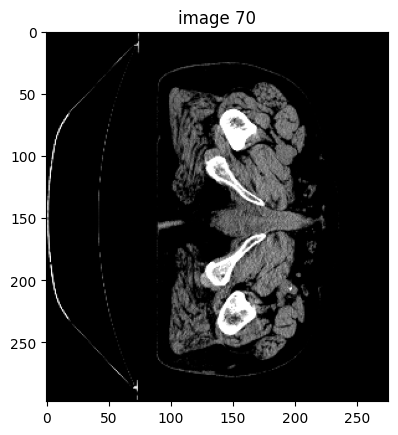

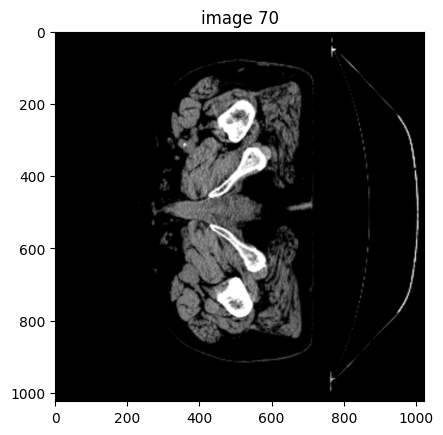

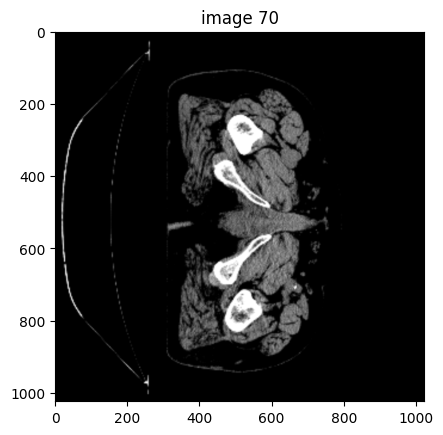

In [30]:
import matplotlib.pyplot as plt

slice_num = 70

plt.figure("check")
plt.title(f"image {slice_num}")
plt.imshow(preprocessed_image['image'].numpy()[0,:, :, slice_num], cmap="gray")
plt.show()

plt.figure("check")
plt.title(f"image {slice_num}")
plt.imshow(output['image'].numpy()[0, :, :, slice_num], cmap="gray")
plt.show()

plt.figure("check")
plt.title(f"image {slice_num}")
plt.imshow(post['image'].numpy()[0, :, :, slice_num], cmap="gray")
plt.show()

Max intensity: 2976.0
Min intensity: -1000.0


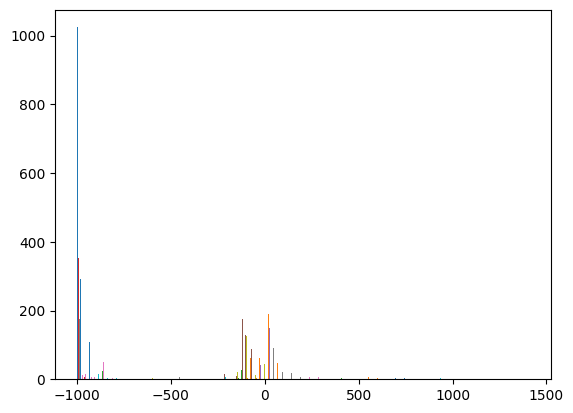

In [14]:
import numpy as np

# Assuming `image_data` is a NumPy array or PyTorch tensor
print("Max intensity:", np.max(data['image'].numpy()))
print("Min intensity:", np.min(data['image'].numpy()))

# Histogram to explore intensity distribution
import matplotlib.pyplot as plt
plt.hist(data['image'].numpy()[:,:,75], bins=100)
plt.show()
